
# <font color='black'>Project 2</font>

## <font color='black'>Exploratory Data Analysis in Python for Retail Sector</font>

In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the Data

In [16]:
# Load dataset
df_analysis = pd.read_csv('./dataset.csv')

In [18]:
# Shape
df_analysis.shape

(9700, 11)

In [19]:
# Data Sample
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [20]:
# Data Sample
df_analysis.tail()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


### Exploratory Analysis

In [21]:
# Columns of the dataset
df_analysis.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'Segment', 'Country', 'City',
       'State', 'Product_ID', 'Category', 'Subcategory', 'Sales_Value'],
      dtype='object')

In [22]:
# Checking the data type of each column
df_analysis.dtypes

Order_ID        object
Order_Date      object
Customer_ID     object
Segment         object
Country         object
City            object
State           object
Product_ID      object
Category        object
Subcategory     object
Sales_Value    float64
dtype: object

In [23]:
# Statistical summary of the column with sales value
df_analysis['Sales_Value'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Sales_Value, dtype: float64

In [24]:
# Checking for duplicate records
df_analysis[df_analysis.duplicated()]

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value


In [25]:
# Checking for missing values
df_analysis.isnull().sum()

Order_ID       0
Order_Date     0
Customer_ID    0
Segment        0
Country        0
City           0
State          0
Product_ID     0
Category       0
Subcategory    0
Sales_Value    0
dtype: int64

In [26]:
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Business Question 1:

#### Which city has the highest sales value for products in the 'Office Supplies' category?

In [27]:
# First, we filter the dataframe for records of the desired category.
df_analysis_p1 = df_analysis[df_analysis['Category'] == 'Office Supplies']

In [28]:
# Next, we group by City and calculate the total sales value.
df_analysis_p1_total = df_analysis_p1.groupby('City')['Sales_Value'].sum()

In [29]:
# Then we find the city with the highest sales value.
city_highest_sales = df_analysis_p1_total.idxmax()
print("City with the highest sales value for Office Supplies':", city_highest_sales)

City with the highest sales value for Office Supplies': New York City


In [30]:
# To confirm the result.
df_analysis_p1_total.sort_values(ascending = False)

City
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Sales_Value, Length: 480, dtype: float64

### Business Question 2:

#### What is the Total Sales by Order Date?



In [31]:
# We calculate the total sales for each order date.
df_analysis_p2 = df_analysis.groupby('Order_Date')['Sales_Value'].sum()

In [32]:
df_analysis_p2.head()

Order_Date
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Sales_Value, dtype: float64

Obs: We are treating the order date as a categorical variable rather than a time series. If the question were "over time", this answer would not be ideal.

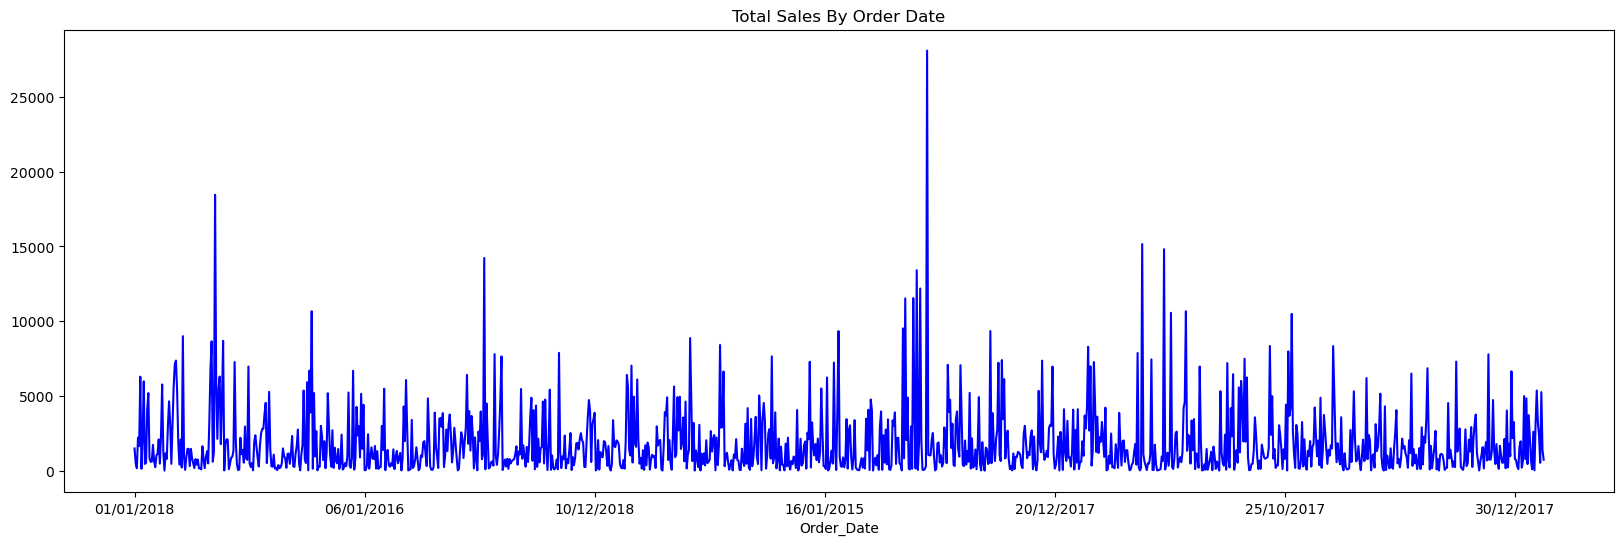

In [34]:
# Plot
plt.figure(figsize = (20, 6))
df_analysis_p2.plot(x = 'Order_Date', y = 'Sales_Value', color = 'blue')
plt.title('Total Sales By Order Date')
plt.show()

### Business Question 3:

#### What is the Total Sales by State?


In [35]:
# We group by state and calculate the total sales.
df_analysis_p3 = df_analysis.groupby('State')['Sales_Value'].sum().reset_index()

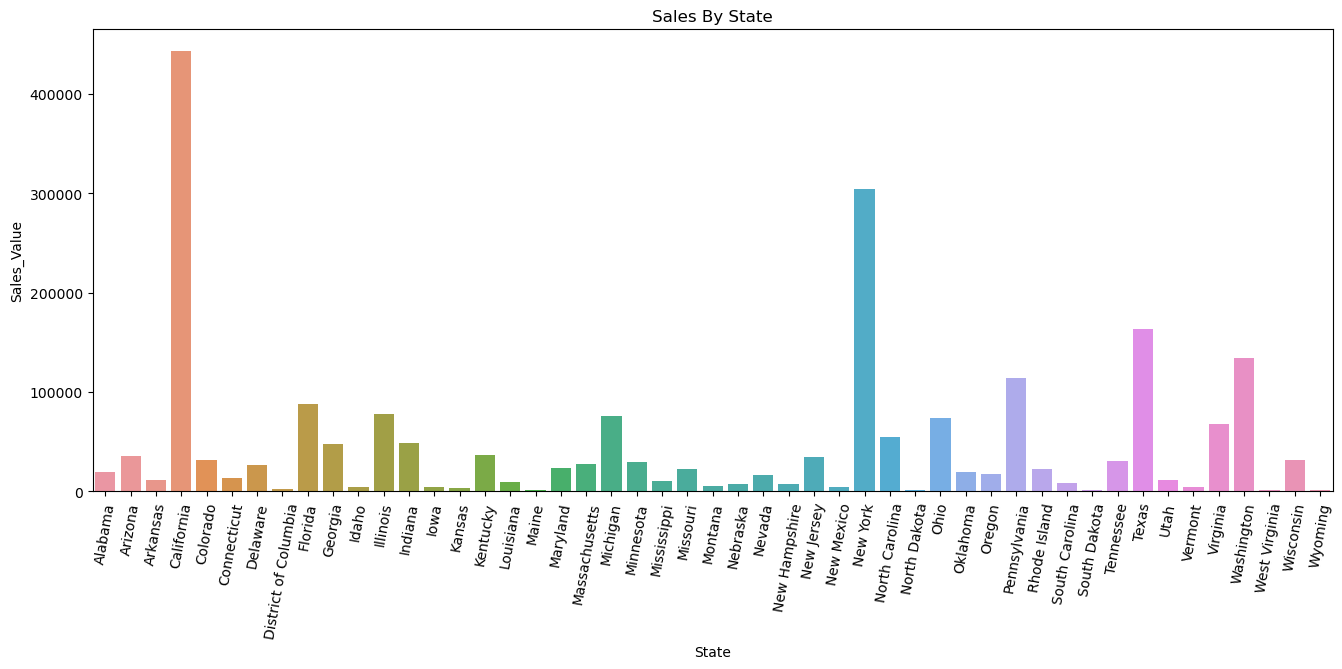

In [42]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_analysis_p3, 
            y = 'Sales_Value', 
            x = 'State').set(title = 'Sales By State')
plt.xticks(rotation = 80)
plt.show()

### Business Question 4:

#### What are the top 10 cities with the highest total sales?



In [43]:
# We group by City, calculate the total sales, and then sort, listing only the top 10 records.
df_analysis_p4 = df_analysis.groupby('City')['Sales_Value'].sum().reset_index().sort_values(by = 'Sales_Value',
                                                                                    ascending = False).head(10)

In [44]:
df_analysis_p4.head(10)

,City,Sales_Value
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


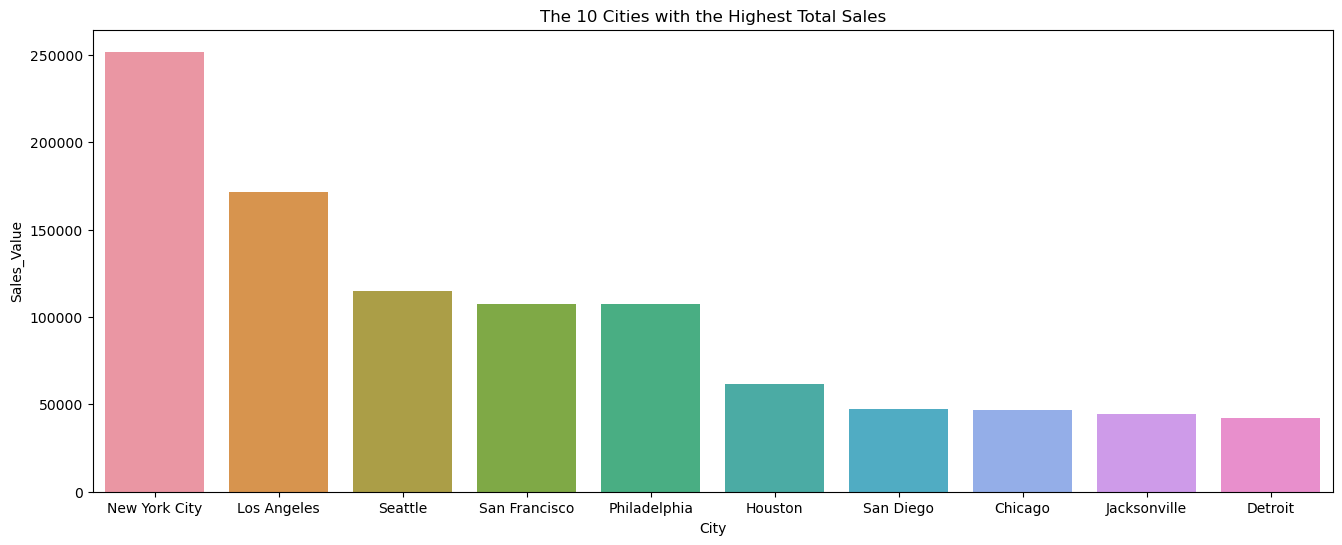

In [45]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_analysis_p4, 
            y = 'Sales_Value', 
            x = 'City').set(title = 'The 10 Cities with the Highest Total Sales')
plt.show()

### Business Question 5:

#### Which segment had the highest total sales?



In [46]:
# We group by segment and calculate the total sales.
df_analysis_p5 = df_analysis.groupby('Segment')['Sales_Value'].sum().reset_index().sort_values(by = 'Sales_Value',
                                                                                      ascending = False)

In [47]:
df_analysis_p5.head()

,Segment,Sales_Value
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [48]:
# Function to convert the data into absolute value
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

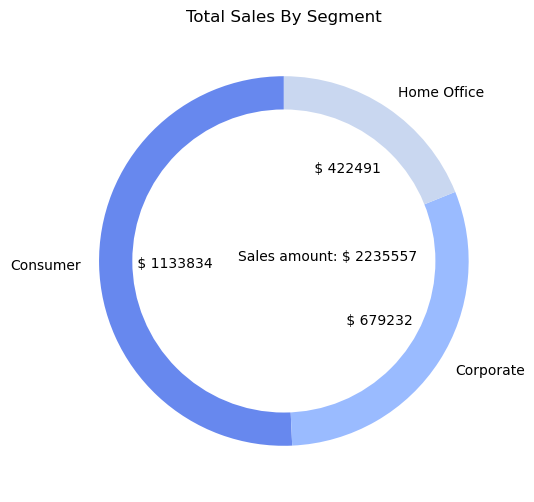

In [49]:
# Plot

# Graph size:
plt.figure(figsize = (16, 6))

# Pie chart
plt.pie(df_analysis_p5['Sales_Value'], 
        labels = df_analysis_p5['Segment'],
        autopct = autopct_format(df_analysis_p5['Sales_Value']),
        startangle = 90)

# Clear the central circle
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels and annotations
plt.annotate(text = 'Sales amount: ' + '$ ' + str(int(sum(df_analysis_p5['Sales_Value']))), xy = (-0.25, 0))
plt.title('Total Sales By Segment')
plt.show()

### Business Question 6:

#### What is the Total Sales by Segment and by Year? 

In [50]:
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [51]:
# We converted the date column to datetime type to obtain the appropriate format.
df_analysis['Order_Date'] = pd.to_datetime(df_analysis['Order_Date'], dayfirst = True)

In [52]:
df_analysis.dtypes

Order_ID               object
Order_Date     datetime64[ns]
Customer_ID            object
Segment                object
Country                object
City                   object
State                  object
Product_ID             object
Category               object
Subcategory            object
Sales_Value           float64
dtype: object

In [53]:
# We extracted the year by creating a new variable.
df_analysis['Year'] = df_analysis['Order_Date'].dt.year

In [54]:
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value,Year
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [55]:
# Total sales by segment and by year
df_analysis_p6 = df_analysis.groupby(['Year', 'Segment'])['Sales_Value'].sum()

In [56]:
df_analysis_p6

Year  Segment    
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Sales_Value, dtype: float64

### Business Question 7:

The company managers are considering granting different discount tiers and would like to simulate based on the following rule:

- If the Sales_Value is greater than 1000, they receive a 15% discount.
- If the Sales_Value is less than 1000, they receive a 10% discount.

#### How many sales would receive a 15% discount?

In [57]:
# Create a new column according to the rule defined above.
df_analysis['Discount'] = np.where(df_analysis['Sales_Value'] > 1000, 0.15, 0.10)

In [58]:
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value,Year,Discount
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [59]:
# Total for each value of the variable
df_analysis['Discount'].value_counts()

0.10    9243
0.15     457
Name: Discount, dtype: int64

In [60]:
print('In Total 457 Sales Would Receive 15% Discount.')

In Total 457 Sales Would Receive 15% Discount.


### Business Question 8:

#### Consider that the company decides to grant the 15% discount from the previous item. What would be the average sales value before and after the discount?

In [61]:
# We created a column by calculating the sales value minus the discount.
df_analysis['Sales_Discount_Value'] = df_analysis['Sales_Value'] - (df_analysis['Sales_Value'] * df_analysis['Discount'])

In [62]:
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value,Year,Discount,Sales_Discount_Value
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [66]:
# Filtering sales before the 15% discount
df_analysis_p8_sales_before_discount = df_analysis.loc[df_analysis['Discount'] == 0.15, 'Sales_Value']

In [67]:
# Filtering sales after the 15% discount
df_analysis_p8_sales_after_discount = df_analysis.loc[df_analysis['Discount'] == 0.15, 'Sales_Discount_Value']

In [68]:
# Calculate the average of sales before the 15% discount
average_sales_before_discount = df_analysis_p8_sales_before_discount.mean()

In [69]:
# Calculate the average of sales after the 15% discount
average_sales_after_discount = df_analysis_p8_sales_after_discount.mean()

In [70]:
print("Average sales before the 15% discount:", round(average_sales_before_discount, 2))

Average sales before the 15% discount: 2116.81


In [71]:
print("Average sales after the 15% discount:", round(average_sales_after_discount, 2))

Average sales after the 15% discount: 1799.29


### Business Question 9:

#### What is the average sales by segment, by year, and by month?


In [72]:
# We extracted the month and saved it into a new variable.
df_analysis['Month'] = df_analysis['Order_Date'].dt.month

In [73]:
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value,Year,Discount,Sales_Discount_Value,Month
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [74]:
# We grouped by year, month, and segment, and calculated aggregation statistics.
df_analysis_p9 = df_analysis.groupby(['Year', 'Month', 'Segment'])['Sales_Value'].agg([np.sum, np.mean, np.median])

In [75]:
df_analysis_p9

sum        mean  median
Year Month Segment                                    
2015 1     Consumer      6896.6290  146.736787  36.440
           Corporate     1701.5280  130.886769  51.940
           Home Office   5607.5500  329.855882  62.820
     2     Consumer      3167.8540  117.327926  22.776
           Corporate      623.1180   69.235333  62.310
...                            ...         ...     ...
2018 11    Corporate    44357.9862  341.215278  79.530
           Home Office  24009.3840  247.519423  56.560
     12    Consumer     48107.4558  183.616244  52.533
           Corporate    20524.4320  153.167403  46.460
           Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [76]:
# Let's extract the levels
years = df_analysis_p9.index.get_level_values(0)
months = df_analysis_p9.index.get_level_values(1)
segments = df_analysis_p9.index.get_level_values(2)

https://seaborn.pydata.org/generated/seaborn.relplot.html

<Figure size 1200x600 with 0 Axes>

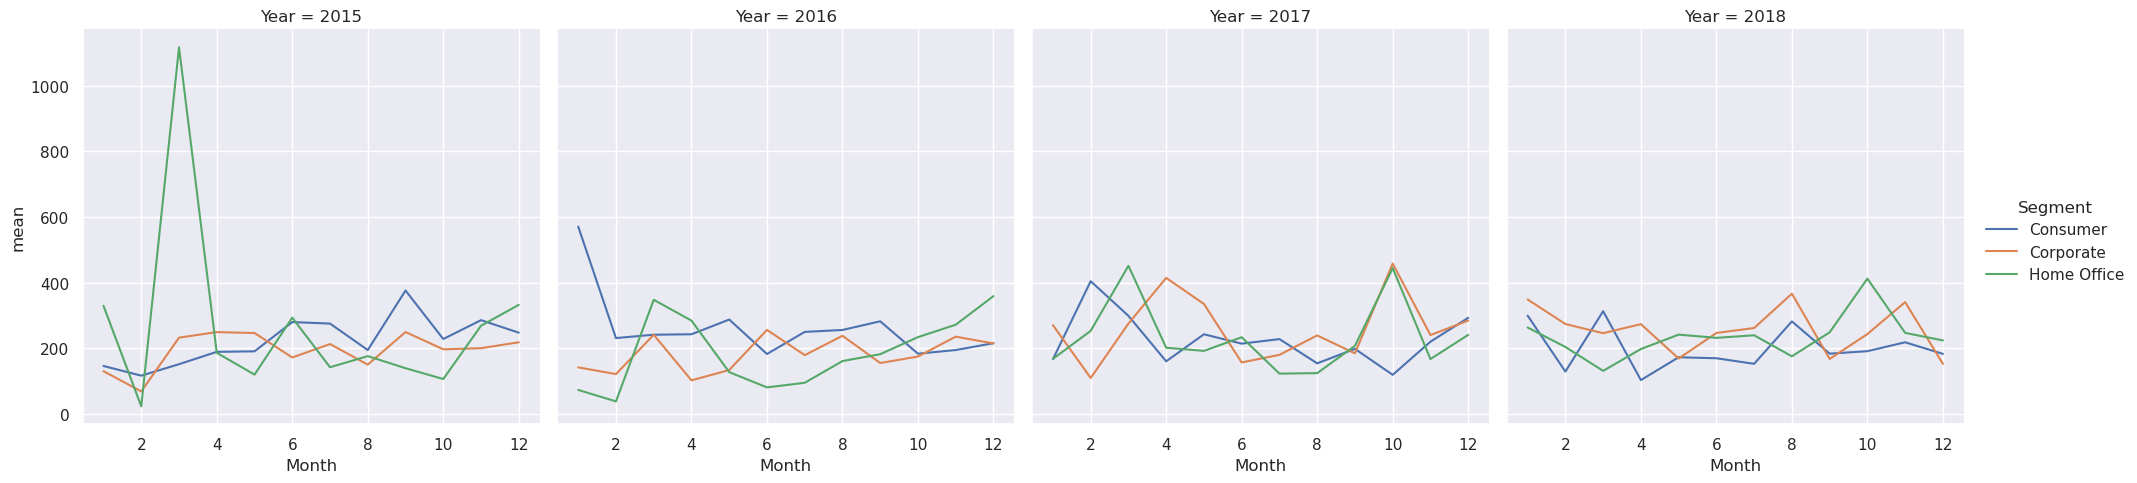

In [77]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_analysis_p9, 
                   y = 'mean', 
                   x = months,
                   hue = segments, 
                   col = years,
                   col_wrap = 4)
plt.show()

### Business Question 10:
#### What is the Total Sales by Category and Subcategory, considering only the Top 12 Subcategories?

In [78]:
df_analysis.head()

,Order_ID,Order_Date,Customer_ID,Segment,Country,City,State,Product_ID,Category,Subcategory,Sales_Value,Year,Discount,Sales_Discount_Value,Month
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [79]:
# We grouped by category and subcategory and calculated the sum only for numerical variables.
df_analysis_p10 = df_analysis.groupby(['Category',
                             'Subcategory']).sum(numeric_only = True).sort_values('Sales_Value',
                                                                                   ascending = False).head(12)

In [80]:
# We converted the Sales_Value column to integer and sorted by category.
df_analysis_p10 = df_analysis_p10[['Sales_Value']].astype(int).sort_values(by = 'Category').reset_index()

Note: Classifying the item above by category is important to fill the chart with the subcategories for each category in an orderly manner.

In [81]:
# DataFrame with categories and subcategories
df_analysis_p10

,Category,Subcategory,Sales_Value
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [82]:
# We created another dataframe with totals per category
df_analysis_p10_cat = df_analysis_p10.groupby('Category').sum(numeric_only = True).reset_index()

In [83]:
# DataFrame with categories
df_analysis_p10_cat

,Category,Sales_Value
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [85]:
# Lists of colors for categories
colors_categories = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [86]:
# Lists of colors for subcategories
colors_subcategories = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

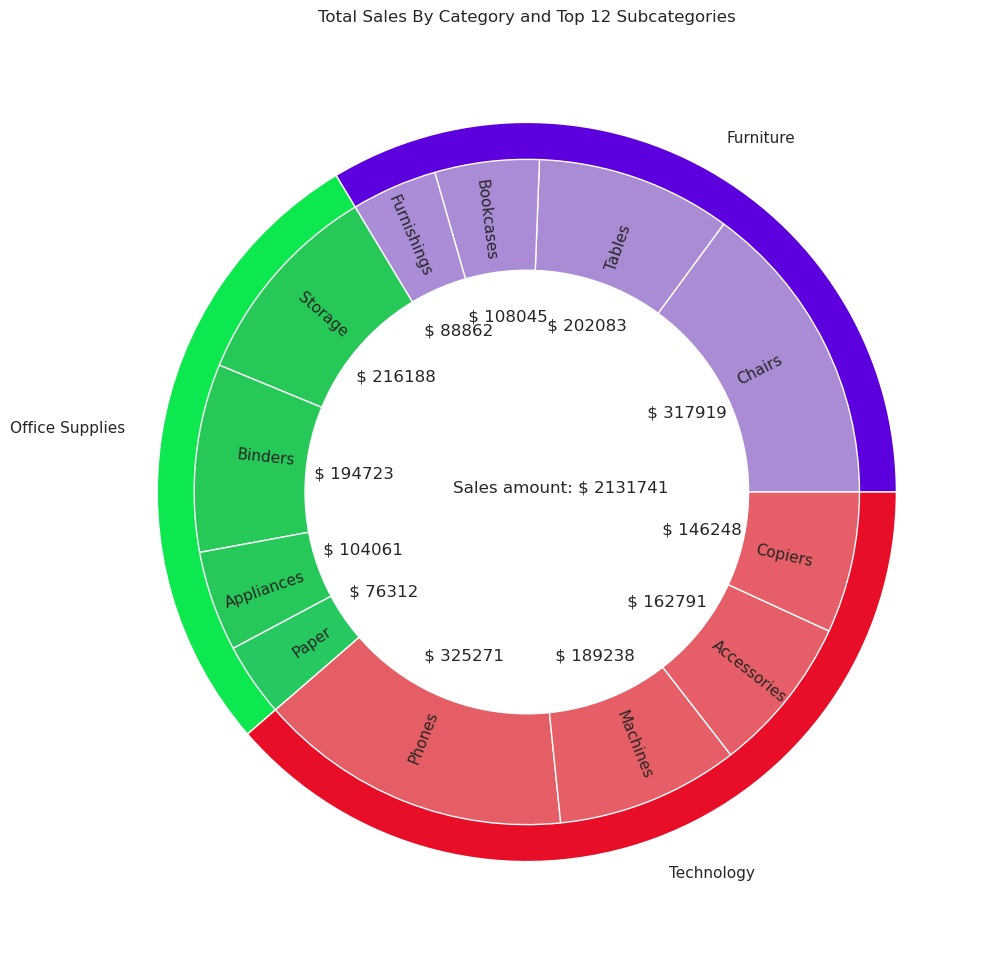

In [87]:
# Plot

#Figure size
fig, ax = plt.subplots(figsize = (18,12))

# Plot of categories
p1 = ax.pie(df_analysis_p10_cat['Sales_Value'], 
            radius = 1,
            labels = df_analysis_p10_cat['Category'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = colors_categories)

# Plot of subcategories
p2 = ax.pie(df_analysis_p10['Sales_Value'],
            radius = 0.9,
            labels = df_analysis_p10['Subcategory'],
            autopct = autopct_format(df_analysis_p10['Sales_Value']),
            colors = colors_subcategories, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Clear the center of the circle
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels and annotations
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Sales amount: ' + '$ ' + str(int(sum(df_analysis_p10['Sales_Value']))), xy = (-0.2, 0))
plt.title('Total Sales By Category and Top 12 Subcategories')
plt.show()